In [116]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import root_mean_squared_error

import sys
parent_dir = os.path.dirname(os.path.abspath(''))
sys.path.insert(0,parent_dir)
import ensamble_model as em
importlib.reload(em)


# Train Data
fd = '../../../data/main_data/train/train_cutoff.csv'
train = pd.read_csv(fd)

# Test Data
fd = '../../../data/main_data/test/test_cutoff.csv'
test = pd.read_csv(fd)

save_dir = '../../saved_models'

In [117]:
print(len(train))
print(len(test))

6011
1503


## This is a description of how the ensamble model works and what it is doing under all of the code

The general object below is just a general_Regression object that can be changed to any model, like linear regression, Lasso, Ridge, decision tree, random forest, gradient boost regression.  You can also put in the parameters for these in the **kwargs argument, it will deal with it correctly with the names, for example max_depth=6 in a decision tree.


In [118]:
# Baseline model, what we want to beat!

general = em.general_Regression(train,type='LR')
general.perform_CV()

MSE for train: mean: 72623706803699.4 std: 2413695924086.635
MSE for test:  mean: 77501261875826.39  std: 22760098913673.71

RMSE for train: mean: 8520761.749524457 std: 142569.32187639058
RMSE for test: mean: 8714154.806232417 std: 1250906.826603359

R^2 for train: mean: 0.4334621876499688 std: 0.0045068307776851045
R^2 for test: mean: 0.39327084690586595 std: 0.06310300984290591

MAE for train: mean: 4796817.121966213 std: 59314.125736769354
MAE for test: mean: 4895717.32982328 std: 336564.6058878954

MAPE for train: mean: 3.8548940676970567 std: 0.05706196357699374
MAPE for test: mean: 3.9102106581527742 std: 0.34207215293176607



In [119]:
# experiment and look at the residuals and predictions:
bl_train = train.copy()
bl_train['pred'] = general.predict(bl_train)
bl_train['residual'] = bl_train[general.target] - bl_train['pred']
bl_train.head()

,name,dob,pos,height,foot,date,market_value,adjusted_market_value,team,league,...,accuratePass,accurateLongBalls,accurateCross,accurateKeeperSweeper,expectedAssists,expectedGoals,xGChain,xGBuildup,pred,residual
0,carlos kameni,1984-02-17,G,186.0,right,2017-05-21,2000000.0,2604836,Málaga,LaLiga,...,11.901408,6.788732,0.000000,0.563380,0.000282,0.000000,0.051594,0.051312,-2.138496e+06,4.743332e+06
1,lirim qamili,1998-06-03,F,191.0,left,2024-10-20,450000.0,450000,Sønderjyske Fodbold,Superligaen,...,10.578125,0.390625,0.218750,0.000000,0.000000,0.000000,0.000000,0.000000,5.104281e+06,-4.654281e+06
2,emil bohinen,1999-03-11,M,185.0,left,2024-10-05,1800000.0,1800000,Genoa,Serie A,...,17.648148,0.555556,0.148148,0.000000,0.017047,0.008154,0.085681,0.068493,4.078096e+06,-2.278096e+06
3,odysseus velanas,1998-06-04,M,180.0,right,2024-10-20,750000.0,750000,PEC Zwolle,Eredivisie,...,13.441860,0.441860,0.395349,0.000000,0.105608,0.130114,0.000000,0.000000,8.322521e+05,-8.225213e+04
4,paulo vitor,1988-11-20,G,195.0,right,2023-05-27,200000.0,211267,Chaves,Liga Portugal Betclic,...,18.484848,5.575758,0.000000,0.575758,0.000000,0.000000,0.000000,0.000000,-1.234949e+06,1.446216e+06


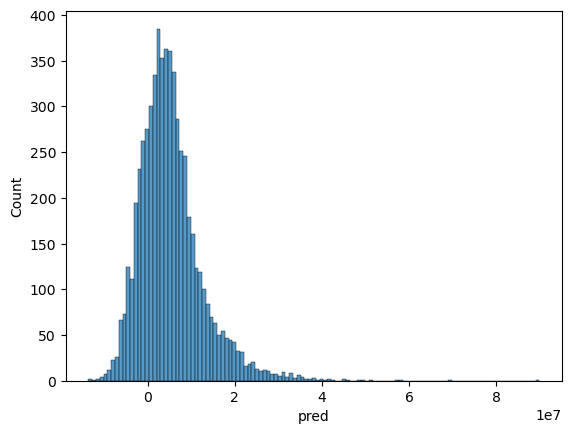

In [120]:
# lets look at the distribution of the target:
sns.histplot(bl_train,x='pred')
plt.show()

In [121]:
# So we are getting negative numbers, this is not good!

In [122]:
# Baseline model, what we want to beat! With log(1+x)

general = em.general_Regression(train,type='LR', scale='log')
general.perform_CV()

MSE for train: mean: 0.6861307182104541 std: 0.004523339287404927
MSE for test:  mean: 0.7073770125460588  std: 0.042086824833923356

RMSE for train: mean: 0.8283255786690047 std: 0.0027301892082625514
RMSE for test: mean: 0.8406855111412088 std: 0.02499767795822991

R^2 for train: mean: 0.6215238494694159 std: 0.0026665629554456457
R^2 for test: mean: 0.6087982911870997 std: 0.024948490575936955

MAE for train: mean: 0.6582628236652279 std: 0.0028065033233199165
MAE for test: mean: 0.6667729403013316 std: 0.022230136849317017

MAPE for train: mean: 0.04570257726215997 std: 0.0001805049310807804
MAPE for test: mean: 0.04627086197460625 std: 0.0013962440361431454



In [123]:
# experiment and look at the residuals and predictions:
bl_train = train.copy()
bl_train['adjusted_market_value'] = general.scale_target(bl_train['adjusted_market_value'])
bl_train['pred'] = general.predict(bl_train)
bl_train['residual'] = general.scale_target(bl_train[general.target]) - bl_train['pred']
bl_train.head()

,name,dob,pos,height,foot,date,market_value,adjusted_market_value,team,league,...,accuratePass,accurateLongBalls,accurateCross,accurateKeeperSweeper,expectedAssists,expectedGoals,xGChain,xGBuildup,pred,residual
0,carlos kameni,1984-02-17,G,186.0,right,2017-05-21,2000000.0,14.772881,Málaga,LaLiga,...,11.901408,6.788732,0.000000,0.563380,0.000282,0.000000,0.051594,0.051312,13.213109,-10.454817
1,lirim qamili,1998-06-03,F,191.0,left,2024-10-20,450000.0,13.017005,Sønderjyske Fodbold,Superligaen,...,10.578125,0.390625,0.218750,0.000000,0.000000,0.000000,0.000000,0.000000,14.137490,-11.497219
2,emil bohinen,1999-03-11,M,185.0,left,2024-10-05,1800000.0,14.403298,Genoa,Serie A,...,17.648148,0.555556,0.148148,0.000000,0.017047,0.008154,0.085681,0.068493,14.300941,-11.566359
3,odysseus velanas,1998-06-04,M,180.0,right,2024-10-20,750000.0,13.527830,PEC Zwolle,Eredivisie,...,13.441860,0.441860,0.395349,0.000000,0.105608,0.130114,0.000000,0.000000,14.375393,-11.699327
4,paulo vitor,1988-11-20,G,195.0,right,2023-05-27,200000.0,12.260883,Chaves,Liga Portugal Betclic,...,18.484848,5.575758,0.000000,0.575758,0.000000,0.000000,0.000000,0.000000,13.056294,-10.471475


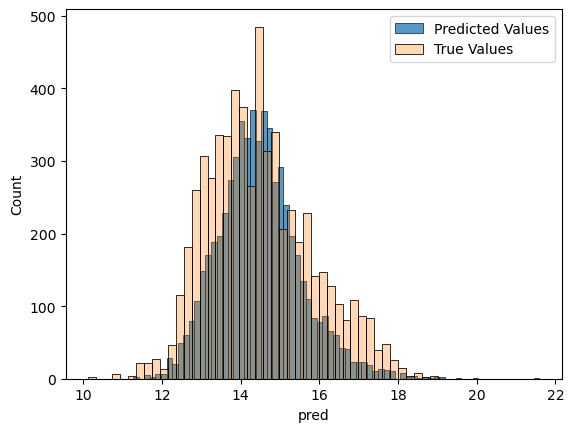

In [124]:
# lets look at the distribution of the target:
fig,ax = plt.subplots()
sns.histplot(bl_train,x='pred',label='Predicted Values')
sns.histplot(bl_train,x='adjusted_market_value',alpha=0.3,label='True Values')
plt.legend()
plt.show()

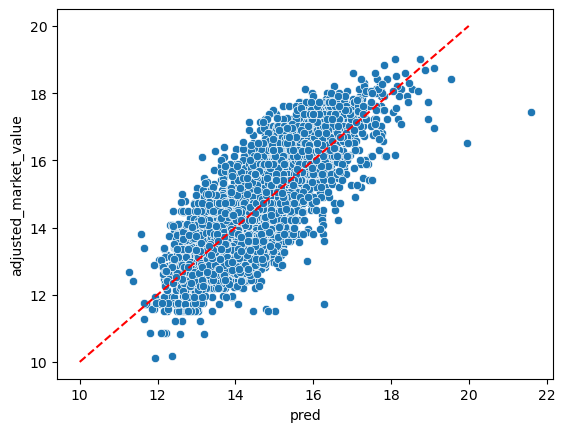

In [125]:
x = np.linspace(10,20)
fig,ax = plt.subplots()
sns.scatterplot(bl_train,x='pred',y='adjusted_market_value',ax=ax)
plt.plot(x,x,color='red',linestyle='--')
plt.show()

In [126]:
# Train RMSE
y_train = general.scale_target(train['adjusted_market_value'])
y_pred = general.predict(train)
print(root_mean_squared_error(y_train,y_pred))

0.8289452014619593


In [127]:
# Test RMSE
y_test = general.scale_target(test['adjusted_market_value'])
y_pred = general.predict(test)
print(root_mean_squared_error(y_test,y_pred))

0.850469401915584


In [128]:
 #How is this for each position on train?

# G 
g_pos = train[train['pos'] == 'G']

y_g_true =general.scale_target(g_pos['adjusted_market_value'])
y_g_pred = general.predict(g_pos)

print(f'g-position:\n RMSE train: {root_mean_squared_error(y_g_true,y_g_pred)}')

# D 
d_pos = train[train['pos'] == 'D']

y_d_true = general.scale_target(d_pos['adjusted_market_value'])
y_d_pred = general.predict(d_pos)

print(f'd-position:\n RMSE train: {root_mean_squared_error(y_d_true,y_d_pred)}')

# M 
m_pos = train[train['pos'] == 'M']

y_m_true = general.scale_target(m_pos['adjusted_market_value'])
y_m_pred = general.predict(m_pos)

print(f'm-position:\n RMSE train: {root_mean_squared_error(y_m_true,y_m_pred)}')

# F 
f_pos = train[train['pos'] == 'F']

y_f_true = general.scale_target(f_pos['adjusted_market_value'])
y_f_pred = general.predict(f_pos)


print(f'd-position:\n RMSE train: {root_mean_squared_error(y_f_true,y_f_pred)}')

g-position:
 RMSE train: 0.8874176970583811
d-position:
 RMSE train: 0.788362141968143


m-position:
 RMSE train: 0.8270333973764842
d-position:
 RMSE train: 0.8766757514138285


In [129]:
# How is this for each position on test?

# G 
g_pos = test[test['pos'] == 'G']

y_g_true =general.scale_target(g_pos['adjusted_market_value'])
y_g_pred = general.predict(g_pos)

print(f'g-position:\n RMSE train: {root_mean_squared_error(y_g_true,y_g_pred)}')

# D 
d_pos = test[test['pos'] == 'D']

y_d_true = general.scale_target(d_pos['adjusted_market_value'])
y_d_pred = general.predict(d_pos)

print(f'd-position:\n RMSE train: {root_mean_squared_error(y_d_true,y_d_pred)}')

# M 
m_pos = test[test['pos'] == 'M']

y_m_true = general.scale_target(m_pos['adjusted_market_value'])
y_m_pred = general.predict(m_pos)

print(f'm-position:\n RMSE train: {root_mean_squared_error(y_m_true,y_m_pred)}')

# F 
f_pos = test[test['pos'] == 'F']

y_f_true = general.scale_target(f_pos['adjusted_market_value'])
y_f_pred = general.predict(f_pos)


print(f'd-position:\n RMSE train: {root_mean_squared_error(y_f_true,y_f_pred)}')

g-position:
 RMSE train: 0.8112317018714869
d-position:
 RMSE train: 0.8575963793551753
m-position:
 RMSE train: 0.8412157735436403
d-position:
 RMSE train: 0.8705211016617872


In [130]:
# Lets look Ridge Regression.
lasso_gen = em.general_Regression(train,scale='log',type='LASSO',alpha=0.5)
lasso_gen.perform_CV()

MSE for train: mean: 1.5966074189598303 std: 0.009141108716175144
MSE for test:  mean: 1.5979163841994732  std: 0.06927865084072748

RMSE for train: mean: 1.263564148579801 std: 0.0036140536289140796
RMSE for test: mean: 1.2637944644587107 std: 0.027201761027445752

R^2 for train: mean: 0.11930465741508756 std: 0.003952623864645737
R^2 for test: mean: 0.11727686459030226 std: 0.0070859542374029595

MAE for train: mean: 1.0182875502216289 std: 0.002823975954491414
MAE for test: mean: 1.0186840304328009 std: 0.017737999144257725

MAPE for train: mean: 0.070345017915285 std: 0.00017794005245808962
MAPE for test: mean: 0.07037240952080728 std: 0.001050271409197301



In [131]:
# Lets look Ridge Regression.
ridge_gen = em.general_Regression(train,scale='log',type='RIDGE',alpha=0.5)
ridge_gen.perform_CV()

MSE for train: mean: 0.6869045812572308 std: 0.004530036875362882
MSE for test:  mean: 0.707938341829249  std: 0.04234866164214492

RMSE for train: mean: 0.828792564181477 std: 0.0027325472956850508
RMSE for test: mean: 0.8410143116163761 std: 0.025164846228061134

R^2 for train: mean: 0.6210971534816715 std: 0.002645294978881644
R^2 for test: mean: 0.6085089430139756 std: 0.024799119779975173

MAE for train: mean: 0.6586193786104388 std: 0.002855996843179518
MAE for test: mean: 0.6668093880301988 std: 0.022314605089524698

MAPE for train: mean: 0.04572458062474171 std: 0.00018382123433298946
MAPE for test: mean: 0.04627135603856043 std: 0.001397094825020697



In [132]:
# PCA with linear regression
pca_gen = em.general_Regression(train,scale='log',type='PCA_LR')
pca_gen.perform_CV()

MSE for train: mean: 0.6861301144421516 std: 0.004523352822430607
MSE for test:  mean: 0.7073726175141555  std: 0.042091706563841175

RMSE for train: mean: 0.8283252141872849 std: 0.0027301984799944236
RMSE for test: mean: 0.840682806206676 std: 0.025000737241608405

R^2 for train: mean: 0.621524182275415 std: 0.002666603163490385
R^2 for test: mean: 0.608800796094833 std: 0.02495001702810034

MAE for train: mean: 0.6582624755715026 std: 0.0028061118702626437
MAE for test: mean: 0.6667699304154582 std: 0.02223162891918684

MAPE for train: mean: 0.04570255109570322 std: 0.00018046904891217715
MAPE for test: mean: 0.0462706449209021 std: 0.0013963186862114305



In [133]:
# PCA with linear regression
pca_ridge_gen = em.general_Regression(train,scale='log',type='PCA_RIDGE',alpha=5)
pca_ridge_gen.perform_CV()

MSE for train: mean: 0.6880908900382113 std: 0.0045286874933805465
MSE for test:  mean: 0.7085165348777737  std: 0.04226791537739734

RMSE for train: mean: 0.8295079515619392 std: 0.002729163558116325
RMSE for test: mean: 0.8413592045640425 std: 0.025124167113267294

R^2 for train: mean: 0.6204429229680677 std: 0.002623349154843306
R^2 for test: mean: 0.6081946510722399 std: 0.02469505332854876

MAE for train: mean: 0.6595661794921783 std: 0.002840679507113544
MAE for test: mean: 0.6674133455630658 std: 0.022040128515583585

MAPE for train: mean: 0.04578508676417929 std: 0.00018269511462738796
MAPE for test: mean: 0.04630836996836855 std: 0.0013769143967152719



In [134]:
# Finally, lets try a GBR model on the whole feature space:

GBR_general = em.general_Regression(train,scale='log',type='GBR',max_depth= 2, n_estimators= 40, min_samples_split= 10, min_samples_leaf= 2, bootstrap= True)
GBR_general.perform_CV()

MSE for train: mean: 0.47212023726705665 std: 0.0067119971103131015
MSE for test:  mean: 0.6029231057257294  std: 0.05524338634235491

RMSE for train: mean: 0.687092664552369 std: 0.004889538360884128
RMSE for test: mean: 0.7756405224558934 std: 0.03612320099434884

R^2 for train: mean: 0.7395782864556832 std: 0.0034583296613508994
R^2 for test: mean: 0.6667762443765715 std: 0.029568343177912675

MAE for train: mean: 0.5379240240754883 std: 0.004066171590011714
MAE for test: mean: 0.6065411379493783 std: 0.028904840530331953

MAPE for train: mean: 0.037310934105496206 std: 0.000294830132631494
MAPE for test: mean: 0.041992483601966765 std: 0.001973758747080499



In [135]:
# experiment and look at the residuals and predictions:
gbr_train = train.copy()
gbr_train['adjusted_market_value'] = GBR_general.scale_target(gbr_train['adjusted_market_value'])
gbr_train['pred'] = GBR_general.predict(gbr_train)
gbr_train['residual'] = GBR_general.scale_target(gbr_train[general.target]) - gbr_train['pred']
gbr_train.head()

,name,dob,pos,height,foot,date,market_value,adjusted_market_value,team,league,...,accuratePass,accurateLongBalls,accurateCross,accurateKeeperSweeper,expectedAssists,expectedGoals,xGChain,xGBuildup,pred,residual
0,carlos kameni,1984-02-17,G,186.0,right,2017-05-21,2000000.0,14.772881,Málaga,LaLiga,...,11.901408,6.788732,0.000000,0.563380,0.000282,0.000000,0.051594,0.051312,13.821754,-11.063462
1,lirim qamili,1998-06-03,F,191.0,left,2024-10-20,450000.0,13.017005,Sønderjyske Fodbold,Superligaen,...,10.578125,0.390625,0.218750,0.000000,0.000000,0.000000,0.000000,0.000000,13.654239,-11.013968
2,emil bohinen,1999-03-11,M,185.0,left,2024-10-05,1800000.0,14.403298,Genoa,Serie A,...,17.648148,0.555556,0.148148,0.000000,0.017047,0.008154,0.085681,0.068493,14.417272,-11.682691
3,odysseus velanas,1998-06-04,M,180.0,right,2024-10-20,750000.0,13.527830,PEC Zwolle,Eredivisie,...,13.441860,0.441860,0.395349,0.000000,0.105608,0.130114,0.000000,0.000000,14.089674,-11.413608
4,paulo vitor,1988-11-20,G,195.0,right,2023-05-27,200000.0,12.260883,Chaves,Liga Portugal Betclic,...,18.484848,5.575758,0.000000,0.575758,0.000000,0.000000,0.000000,0.000000,12.952702,-10.367883


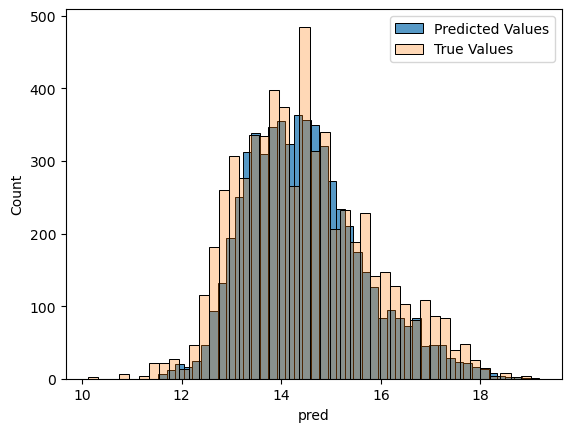

In [136]:
# lets look at the distribution of the target:
fig,ax = plt.subplots()
sns.histplot(gbr_train,x='pred',label='Predicted Values')
sns.histplot(gbr_train,x='adjusted_market_value',alpha=0.3, label='True Values')
plt.legend()
plt.show()

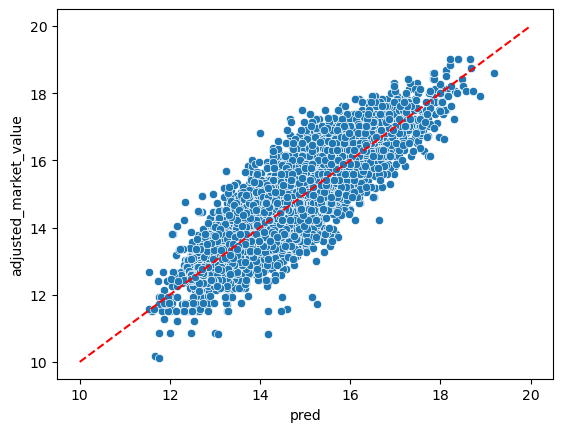

In [137]:
x = np.linspace(10,20)
fig,ax = plt.subplots()
sns.scatterplot(gbr_train,x='pred',y='adjusted_market_value')
plt.plot(x,x,color='red',linestyle='--')
plt.show()

In [138]:
# Train RMSE
y_train = GBR_general.scale_target(train['adjusted_market_value'])
y_pred = GBR_general.predict(train)
print(root_mean_squared_error(y_train,y_pred))

0.6893169377412588


In [139]:
# Test RMSE
y_test = GBR_general.scale_target(test['adjusted_market_value'])
y_pred = GBR_general.predict(test)
print(root_mean_squared_error(y_test,y_pred))

0.8040315844090907


In [140]:
# How is this for each position on train?

# G 
g_pos = train[train['pos'] == 'G']

y_g_true =GBR_general.scale_target(g_pos['adjusted_market_value'])
y_g_pred = GBR_general.predict(g_pos)

print(f'g-position:\n RMSE train: {root_mean_squared_error(y_g_true,y_g_pred)}')

# D 
d_pos = train[train['pos'] == 'D']

y_d_true = GBR_general.scale_target(d_pos['adjusted_market_value'])
y_d_pred = GBR_general.predict(d_pos)

print(f'd-position:\n RMSE train: {root_mean_squared_error(y_d_true,y_d_pred)}')

# M 
m_pos = train[train['pos'] == 'M']

y_m_true = GBR_general.scale_target(m_pos['adjusted_market_value'])
y_m_pred = GBR_general.predict(m_pos)

print(f'm-position:\n RMSE train: {root_mean_squared_error(y_m_true,y_m_pred)}')

# F 
f_pos = train[train['pos'] == 'F']

y_f_true = GBR_general.scale_target(f_pos['adjusted_market_value'])
y_f_pred = GBR_general.predict(f_pos)


print(f'd-position:\n RMSE train: {root_mean_squared_error(y_f_true,y_f_pred)}')

g-position:
 RMSE train: 0.7355871852086927


d-position:
 RMSE train: 0.6599119426005148
m-position:
 RMSE train: 0.7082347757770723
d-position:
 RMSE train: 0.6843838013861401


In [141]:
# How is this for each position on test?

# G 
g_pos = test[test['pos'] == 'G']

y_g_true =GBR_general.scale_target(g_pos['adjusted_market_value'])
y_g_pred = GBR_general.predict(g_pos)

print(f'g-position:\n RMSE train: {root_mean_squared_error(y_g_true,y_g_pred)}')

# D 
d_pos = test[test['pos'] == 'D']

y_d_true = GBR_general.scale_target(d_pos['adjusted_market_value'])
y_d_pred = GBR_general.predict(d_pos)

print(f'd-position:\n RMSE train: {root_mean_squared_error(y_d_true,y_d_pred)}')

# M 
m_pos = test[test['pos'] == 'M']

y_m_true = GBR_general.scale_target(m_pos['adjusted_market_value'])
y_m_pred = GBR_general.predict(m_pos)

print(f'm-position:\n RMSE train: {root_mean_squared_error(y_m_true,y_m_pred)}')

# F 
f_pos = test[test['pos'] == 'F']

y_f_true = GBR_general.scale_target(f_pos['adjusted_market_value'])
y_f_pred = GBR_general.predict(f_pos)


print(f'd-position:\n RMSE train: {root_mean_squared_error(y_f_true,y_f_pred)}')

g-position:
 RMSE train: 0.785135300130637


d-position:
 RMSE train: 0.8226787635264582
m-position:
 RMSE train: 0.8102379208663982
d-position:
 RMSE train: 0.765588714232707


In [ ]:
# Lets do Hyperparameter tuning on just all of the features.
gen_hp = em.hyperparameter_tuning_general(train,n_iter=100,cv=3,scale='log',beta=3,model=em.general_Regression)
print(gen_hp.best_params)
print(gen_hp.best_score)

In [ ]:
gen_hp.best_model.perform_CV()

#### Furthermore, lets look at how each of the variables 

### Position models
The classes G_Pos, D_Pos, M_Pos, F_Pos, are inherited classes of the general_Regression model above, but specificalyly designed to take in X that only correspond to its position.   If you look at the code in ensamble_mode.py, you can see what features it has for each position, which is what it is using for its model.  Since this is inherits the code from general_Regression, it has all the features of that class.

#### Model for Goalkeepers

In [143]:
#base line model for the G-position
g_model = em.G_Pos(train, scale = 'log')
g_model.perform_CV()


MSE for train: mean: 0.9207258770937875 std: 0.005956879398309816
MSE for test:  mean: 0.928558562844826  std: 0.05392857633172286

RMSE for train: mean: 0.9595396115618368 std: 0.003100151213605531
RMSE for test: mean: 0.9632001086686698 std: 0.028356895201850175

R^2 for train: mean: 0.4921189166987028 std: 0.0035321549345760862
R^2 for test: mean: 0.4864472311337725 std: 0.03200811125628821

MAE for train: mean: 0.7699104737536547 std: 0.0027122031041347523
MAE for test: mean: 0.7732108977615658 std: 0.024686570956864443

MAPE for train: mean: 0.05334493050689211 std: 0.00019031450086156654
MAPE for test: mean: 0.05357250679744983 std: 0.0017197697162513422



In [ ]:
g_hp = em.hyperparameter_tuning_general(train,n_iter=100,cv=3,scale='log',beta=2,model=em.G_Pos)
print(g_hp.best_score)
print(g_hp.best_params)

0.9654560190891792
{'model': 'RFR', 'param': {'max_depth': 6, 'n_estimators': 80, 'max_features': 0.75, 'min_samples_split': 2, 'min_samples_leaf': 2, 'bootstrap': True}}


In [157]:
# Checking better model from hyperparameter tuning
g_hp.best_model.perform_CV()

MSE for train: mean: 0.5989013997456173 std: 0.006841884749436154
MSE for test:  mean: 0.7402647868322203  std: 0.05793309264674911

RMSE for train: mean: 0.7738745855791481 std: 0.004418771358555253
RMSE for test: mean: 0.8597168551706724 std: 0.03393693810097331

R^2 for train: mean: 0.6712649543519278 std: 0.004020217766022703
R^2 for test: mean: 0.5915873754291955 std: 0.032241798760107264

MAE for train: mean: 0.6130106969536885 std: 0.004294997244921597
MAE for test: mean: 0.6781350395743663 std: 0.029378796560374128

MAPE for train: mean: 0.04240007655660107 std: 0.00028393506581299093
MAPE for test: mean: 0.04684152164166127 std: 0.0019172176407402962



In [158]:
em.save_general(save_dir,'cutoff_general','G',g_hp.best_params,g_hp.best_score,RMSE_train=g_hp.best_RMSE_train,RMSE_test=g_hp.best_RMSE_test)

In [159]:
# Test a random model:
g_specific = em.G_Pos(train,type='GBR',scale='log',max_depth=2,n_estimators=30,min_samples_split=2,min_samples_leaf=6,bootstrap=True)
g_specific.perform_CV()

MSE for train: mean: 0.5953214482136024 std: 0.007693493718912121
MSE for test:  mean: 0.6964036946100272  std: 0.053705375169702904

RMSE for train: mean: 0.7715547859736158 std: 0.0049659294004585465
RMSE for test: mean: 0.8338781751335826 std: 0.032417335577026134

R^2 for train: mean: 0.671621452775469 std: 0.0037945537642185656
R^2 for test: mean: 0.6154199148584206 std: 0.022946274250540907

MAE for train: mean: 0.6046899706372414 std: 0.004231348094375177
MAE for test: mean: 0.6521139666879778 std: 0.026452924729826993

MAPE for train: mean: 0.04184535043521167 std: 0.0002758976674693843
MAPE for test: mean: 0.045013787044680065 std: 0.0017595506615701057



In [148]:
# baseline model for the D-position
d_model = em.D_Pos(train,scale='log')
d_model.perform_CV()

MSE for train: mean: 0.7057247314314697 std: 0.00479125877284175
MSE for test:  mean: 0.7255950858168165  std: 0.04499106295694216

RMSE for train: mean: 0.8400694052040519 std: 0.0028505914439118144
RMSE for test: mean: 0.8514084578303877 std: 0.0264333832813263

R^2 for train: mean: 0.6107165800829629 std: 0.0026758295241951398
R^2 for test: mean: 0.5988079254393133 std: 0.025321430051611065

MAE for train: mean: 0.6646579719441167 std: 0.0029992095846301282
MAE for test: mean: 0.6720521157984667 std: 0.022888107127931136

MAPE for train: mean: 0.046106381022880005 std: 0.00019271659004994527
MAPE for test: mean: 0.04659661465123342 std: 0.0014166244664757337



In [ ]:
# Lets look at the D-position and try to make it better.
#from hypertuning, it looks like random forest regressor works well

d_hp = em.hyperparameter_tuning_general(train,n_iter=100,cv=3,scale='log',beta=2,model=em.D_Pos)
print(d_hp.best_score)
print(d_hp.best_params)

0.8983307155826595
{'model': 'RIDGE', 'param': {'alpha': np.float64(9.612244897959183)}}


In [150]:
d_hp.best_model.perform_CV()

MSE for train: mean: 0.7029940569088327 std: 0.006548724461348023
MSE for test:  mean: 0.7209228554991837  std: 0.05881844223795256

RMSE for train: mean: 0.8384382908588645 std: 0.00391015734964024
RMSE for test: mean: 0.8483776409997363 std: 0.03432540969756918

R^2 for train: mean: 0.6141387432816823 std: 0.002855240938139548
R^2 for test: mean: 0.6025940639292021 std: 0.027073120503639605

MAE for train: mean: 0.6647466601951553 std: 0.0033252442405929516
MAE for test: mean: 0.6722951335839524 std: 0.029036168472643543

MAPE for train: mean: 0.04613185791273246 std: 0.0002223716647455127
MAPE for test: mean: 0.046636450209853915 std: 0.0017921349161667199



In [151]:
em.save_general(save_dir,'cutoff_general','D',d_hp.best_params,d_hp.best_score,RMSE_train=d_hp.best_RMSE_train,RMSE_test=d_hp.best_RMSE_test)

In [160]:
# Test specific d-model:
d_specific = em.D_Pos(train,type='GBR',scale='log',max_depth=2,n_estimators=20,min_samples_split=10,min_samples_leaf=6,bootstrap=True)
d_specific.perform_CV()

MSE for train: mean: 0.548786993073547 std: 0.00688186423612256
MSE for test:  mean: 0.6346304902568127  std: 0.059562846923886234

RMSE for train: mean: 0.740787014892559 std: 0.004646680548372201
RMSE for test: mean: 0.7957436938909399 std: 0.03771556561441141

R^2 for train: mean: 0.6972885297677012 std: 0.0034961219722102702
R^2 for test: mean: 0.6495306677462682 std: 0.028528935241159136

MAE for train: mean: 0.5802641245194488 std: 0.003909909738843044
MAE for test: mean: 0.6216819133418239 std: 0.02783268763502778

MAPE for train: mean: 0.040207750503559944 std: 0.000274211311387286
MAPE for test: mean: 0.043041107980884744 std: 0.0018503509084311532



In [ ]:
#baseline model for the M-position
m_model = em.M_Pos(train,scale='log')
m_model.perform_CV()

MSE for train: mean: 0.7012427617280292 std: 0.004941692713903366
MSE for test:  mean: 0.7207155927803411  std: 0.0462262249078111

RMSE for train: mean: 0.8373971950530199 std: 0.0029494822196098574
RMSE for test: mean: 0.8485122113516178 std: 0.02725105442966505

R^2 for train: mean: 0.6131889073826028 std: 0.0027516982095289262
R^2 for test: mean: 0.6015102563886234 std: 0.025963750612109943

MAE for train: mean: 0.6632660717220248 std: 0.003080633699111641
MAE for test: mean: 0.6706089682492065 std: 0.023965589121736935

MAPE for train: mean: 0.04601786006671068 std: 0.000199374379026304
MAPE for test: mean: 0.04650488947896008 std: 0.0015100445342630569



In [ ]:
# Lets improve the m-model
m_hp = em.hyperparameter_tuning_general(train,n_iter=100,cv=3,scale='log',beta=3,model=em.M_Pos)
print(m_hp.best_score)
print(m_hp.best_params)

0.9163696656809789
{'model': 'RIDGE', 'param': {'alpha': np.float64(8.83673469387755)}}


In [ ]:
m_hp.best_model.perform_CV()

MSE for train: mean: 0.6993741431459286 std: 0.0065683521276615805
MSE for test:  mean: 0.7173940114921596  std: 0.05895345140290582

RMSE for train: mean: 0.8362766790672685 std: 0.003931818173499787
RMSE for test: mean: 0.8462876832861081 std: 0.03451331062636321

R^2 for train: mean: 0.6161256028061066 std: 0.0028836238369783955
R^2 for test: mean: 0.6045241964274065 std: 0.02745999732149285

MAE for train: mean: 0.6639324654142045 std: 0.003347424192011463
MAE for test: mean: 0.6715309469377889 std: 0.029514529458794143

MAPE for train: mean: 0.04607994834571343 std: 0.00022386571312763706
MAPE for test: mean: 0.04658758991318203 std: 0.0018301425803982482



In [ ]:
em.save_general(save_dir,'cutoff_general','M',m_hp.best_params,m_hp.best_score,RMSE_train=m_hp.best_RMSE_train,RMSE_test=m_hp.best_RMSE_test)

In [161]:
# Test specific m-model:
m_specific = em.M_Pos(train,type='GBR',scale='log',max_depth=2,n_estimators=50,min_samples_split=10,min_samples_leaf=7,bootstrap=True)
m_specific.perform_CV()

MSE for train: mean: 0.4524809767235407 std: 0.0090394401474795
MSE for test:  mean: 0.5999806507719623  std: 0.04971835509589007

RMSE for train: mean: 0.6726333904647601 std: 0.006730435009883977
RMSE for test: mean: 0.7739019303353013 std: 0.032503122853914934

R^2 for train: mean: 0.7504172262305234 std: 0.004505925597515233
R^2 for test: mean: 0.6683309375611416 std: 0.027191625884700033

MAE for train: mean: 0.5264043863358344 std: 0.005772876908065688
MAE for test: mean: 0.6061039967170759 std: 0.028485277716411347

MAPE for train: mean: 0.036524468572435305 std: 0.0004043366490977118
MAPE for test: mean: 0.041962770556829884 std: 0.0019767436385808006



In [ ]:
#Baseline model for $F$-position
f_model = em.F_Pos(train,scale='log')
f_model.perform_CV()

MSE for train: mean: 0.7057247314314697 std: 0.00479125877284175
MSE for test:  mean: 0.7255950858168165  std: 0.04499106295694216

RMSE for train: mean: 0.8400694052040519 std: 0.0028505914439118144
RMSE for test: mean: 0.8514084578303877 std: 0.0264333832813263

R^2 for train: mean: 0.6107165800829629 std: 0.0026758295241951398
R^2 for test: mean: 0.5988079254393133 std: 0.025321430051611065

MAE for train: mean: 0.6646579719441167 std: 0.0029992095846301282
MAE for test: mean: 0.6720521157984667 std: 0.022888107127931136

MAPE for train: mean: 0.046106381022880005 std: 0.00019271659004994527
MAPE for test: mean: 0.04659661465123342 std: 0.0014166244664757337



In [ ]:
# Lets improve the F-model
f_hp = em.hyperparameter_tuning_general(train,n_iter=100,cv=3,scale='log',beta=3,model=em.F_Pos)
print(f_hp.best_score)
print(f_hp.best_params)

0.9204174382240417
{'model': 'RIDGE', 'param': {'alpha': np.float64(9.612244897959183)}}


In [ ]:
f_hp.best_model.perform_CV()

MSE for train: mean: 0.7029940569088327 std: 0.006548724461348023
MSE for test:  mean: 0.7209228554991837  std: 0.05881844223795256

RMSE for train: mean: 0.8384382908588645 std: 0.00391015734964024
RMSE for test: mean: 0.8483776409997363 std: 0.03432540969756918

R^2 for train: mean: 0.6141387432816823 std: 0.002855240938139548
R^2 for test: mean: 0.6025940639292021 std: 0.027073120503639605

MAE for train: mean: 0.6647466601951553 std: 0.0033252442405929516
MAE for test: mean: 0.6722951335839524 std: 0.029036168472643543

MAPE for train: mean: 0.04613185791273246 std: 0.0002223716647455127
MAPE for test: mean: 0.046636450209853915 std: 0.0017921349161667199



In [ ]:
em.save_general(save_dir,'cutoff_general','F',f_hp.best_params,f_hp.best_score,RMSE_train=f_hp.best_RMSE_train,RMSE_test=f_hp.best_RMSE_test)

## The ensamble model
This is a new class that builds a model for all the positions and puts it together.  The way to set it up is as follows in the next cell.

In [33]:
# To set up the ensamble model with your specifications we do the following:

ex = em.ensamble_model(scale='log')    # this sets up the class ready to take inthe parameters and the data for fitting

ex.G_parameters(type = 'LR') # put the parameters for the G model as just linear regression
ex.D_parameters(type = 'RIDGE', alpha=5)  # puts the parameters for the D model as just linear regression with ridge regularization
ex.F_parameters(type='RFR', max_depth=10)   # puts the forwards parameters as random forest with max depth of 10

# Note that any left our parameters changes, for example M here, is left as just Linear regression

# Once you set up what your model is, we can fit the data to it
ex.fit(train)

# It is now fitted to the data and read to predict things:
result = train.copy()
result[ex.target] = ex.scale_target(result[ex.target])

result['prediction']= ex.predict(train)
result['residual'] = abs(result[ex.target] - result['prediction'])

display(result)


,name,dob,pos,height,foot,date,market_value,adjusted_market_value,team,league,...,accuratePass,accurateLongBalls,accurateCross,accurateKeeperSweeper,expectedAssists,expectedGoals,xGChain,xGBuildup,prediction,residual
0,noah mbamba,2005-01-04,D,187.0,right,2024-02-03,3000000.0,14.914123,Bayer 04 Leverkusen,Bundesliga,...,13.523810,0.619048,0.047619,0.000000,0.025627,0.001195,0.000000,0.000000,13.625808,1.288315
1,zachary duncan,2000-05-29,M,183.0,right,2021-11-07,300000.0,12.815613,AGF,Superligaen,...,9.000000,0.458333,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,13.514280,0.698667
2,manuel neuer,1986-03-26,G,193.0,right,2024-10-19,4000000.0,15.201805,FC Bayern München,Bundesliga,...,27.122881,5.411017,0.000000,0.495763,0.001084,0.000969,0.271096,0.270107,15.496563,0.294758
3,mickel miller,1995-12-01,M,173.0,left,2024-04-12,250000.0,12.429220,Plymouth Argyle,Championship,...,13.837209,0.697674,0.418605,0.000000,0.067950,0.015244,0.000000,0.000000,13.544847,1.115626
4,gaetano monachello,1994-03-02,F,185.0,left,2016-05-15,900000.0,13.991030,Atalanta,Serie A,...,5.700000,0.200000,0.100000,0.000000,0.000000,0.111925,0.161218,0.061587,14.057601,0.066571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,michael svoboda,1998-10-14,D,195.0,right,2024-10-20,1500000.0,14.220976,Venezia,Serie A,...,29.730769,2.653846,0.038462,0.000000,0.038870,0.042371,0.117319,0.117319,14.464836,0.243859
9363,kalifa coulibaly,1991-08-20,F,197.0,right,2022-05-21,1500000.0,14.370794,Nantes,Ligue 1,...,7.405941,0.099010,0.069307,0.000000,0.050634,0.219190,0.265225,0.053416,14.450305,0.079512
9364,nordin jackers,1997-09-04,G,185.0,right,2024-04-28,900000.0,13.710151,Club Brugge KV,"First Division A, Championship Round",...,20.742857,10.514286,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,13.666569,0.043582
9365,mads kikkenborg,1999-10-06,G,197.0,right,2023-12-03,800000.0,13.647174,Lyngby,Superligaen,...,16.488372,7.023256,0.000000,0.488372,0.000000,0.000000,0.000000,0.000000,13.922657,0.275484


# Now lets say you want to figure out which model is the best through a cross-validation.
You can do the above, but now you use a perform_CV(train) to do a cross-validation with the type of parameters you put in
For example:

In [36]:
# make the ensamble model object
ensamble = em.ensamble_model(scale='log')

ensamble.G_parameters(type = 'DT') # put the parameters for the G model as just linear regression
ensamble.D_parameters(type = 'RIDGE', alpha=5)  # puts the parameters for the D model as just linear regression with ridge regularization
ensamble.F_parameters(type='RFR', max_depth=10)   # puts the forwards parameters as random forest with max depth of 10

ensamble.perform_CV(train)

MSE for train: mean: 0.7447681352296309 std: 0.006134996963473714
MSE for test:  mean: 0.9970257610457217  std: 0.06568384573124325

RMSE for train: mean: 0.8629921916154022 std: 0.003551399791051874
RMSE for test: mean: 0.9979734327488321 std: 0.0327839682350073

R^2 for train: mean: 0.6153933446381987 std: 0.002741171726794568
R^2 for test: mean: 0.4842985102039633 std: 0.031129588333427292

MAE for train: mean: 0.6420626256506956 std: 0.002477738683135178
MAE for test: mean: 0.7771672055319406 std: 0.020928391000426858

MAPE for train: mean: 0.04608210603021121 std: 0.00018383726205094345
MAPE for test: mean: 0.05585562483149635 std: 0.001628357580220057



In [89]:
ex = em.ensamble_model(scale='log')
ex.G_parameters(type ='GBR',max_depth = 2, n_estimators = 10,max_features = 0.75, min_samples_split = 5, min_samples_leaf=4,
                bootstrap=True)
ex.D_parameters(type ='GBR', max_depth= 2, n_estimators= 40, max_features= 'sqrt', min_samples_split= 10,
                 min_samples_leaf=2, bootstrap= True )
ex.M_parameters(type='GBR',max_depth=2, n_estimators= 40, max_features= 0.25, min_samples_split= 5,
                 min_samples_leaf=1, bootstrap= True)
ex.F_parameters(type = 'GBR',max_depth= 2, n_estimators= 40, max_features= 0.5, min_samples_split= 2,
                 min_samples_leaf= 5, bootstrap=True)
ex.perform_CV(train)

MSE for train: mean: 0.5569110223153684 std: 0.007250390583410693
MSE for test:  mean: 0.8004242018666347  std: 0.052041440474732886

RMSE for train: mean: 0.7462489269818838 std: 0.004853997708651101
RMSE for test: mean: 0.8942000799135957 std: 0.02881699063319775

R^2 for train: mean: 0.7124022518384336 std: 0.003763633602842667
R^2 for test: mean: 0.5857910492833115 std: 0.02777526830110715

MAE for train: mean: 0.5793641848566887 std: 0.004004150310516548
MAE for test: mean: 0.6965161607327714 std: 0.020991336036524137

MAPE for train: mean: 0.04165949533443455 std: 0.0002938729829286943
MAPE for test: mean: 0.04989065340867574 std: 0.0016407123846776733



In [90]:
ex_data = train.copy()
ex.fit(ex_data)
ex_data['pred'] = ex.predict(ex_data)
ex_data['adjusted_market_value'] = ex.scale_target(ex_data['adjusted_market_value'])
ex_data.head()

,name,dob,pos,height,foot,date,market_value,adjusted_market_value,team,league,...,rating,accuratePass,accurateLongBalls,accurateCross,accurateKeeperSweeper,expectedAssists,expectedGoals,xGChain,xGBuildup,pred
0,noah mbamba,2005-01-04,D,187.0,right,2024-02-03,3000000.0,14.914123,Bayer 04 Leverkusen,Bundesliga,...,5.414286,13.523810,0.619048,0.047619,0.000000,0.025627,0.001195,0.000000,0.000000,13.088227
1,zachary duncan,2000-05-29,M,183.0,right,2021-11-07,300000.0,12.815613,AGF,Superligaen,...,6.545833,9.000000,0.458333,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,13.103743
2,manuel neuer,1986-03-26,G,193.0,right,2024-10-19,4000000.0,15.201805,FC Bayern München,Bundesliga,...,6.536864,27.122881,5.411017,0.000000,0.495763,0.001084,0.000969,0.271096,0.270107,14.161387
3,mickel miller,1995-12-01,M,173.0,left,2024-04-12,250000.0,12.429220,Plymouth Argyle,Championship,...,6.551163,13.837209,0.697674,0.418605,0.000000,0.067950,0.015244,0.000000,0.000000,13.799298
4,gaetano monachello,1994-03-02,F,185.0,left,2016-05-15,900000.0,13.991030,Atalanta,Serie A,...,6.550000,5.700000,0.200000,0.100000,0.000000,0.000000,0.111925,0.161218,0.061587,14.827176


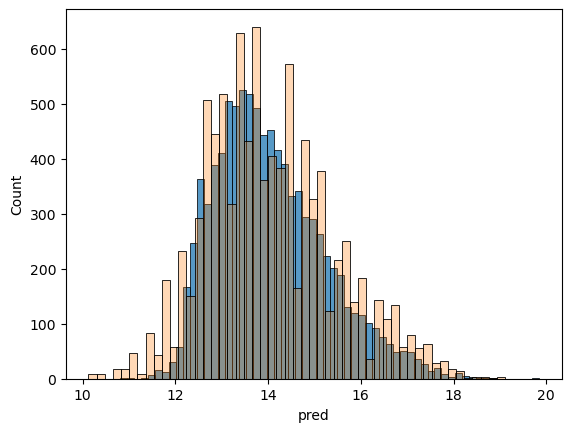

In [91]:
# Histogram for our model
fig,ax = plt.subplots()
sns.histplot(ex_data,x='pred',ax=ax)
sns.histplot(ex_data,x='adjusted_market_value',ax=ax,alpha=0.3)
plt.show()

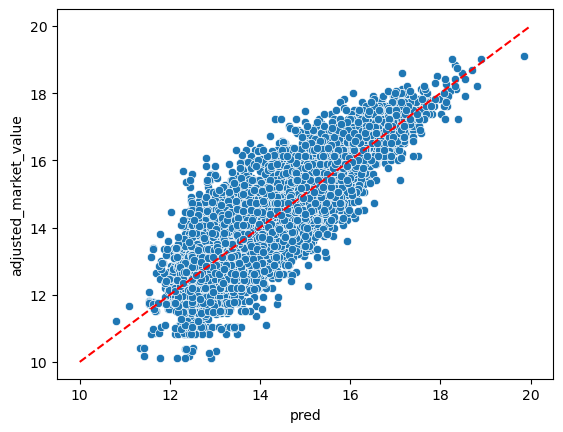

In [92]:
x = np.linspace(10,20)
fig,ax = plt.subplots()
sns.scatterplot(ex_data,x='pred',y='adjusted_market_value')
plt.plot(x,x,color='red',linestyle='--')
plt.show()

In [115]:
# This test an ensemble model of the best parameters above for each position


pos_hp = em.ensamble_model(scale='log')
pos_hp.G_parameters(type ='GBR',max_depth = 2, n_estimators = 20, min_samples_split = 5, min_samples_leaf=6,
                bootstrap=True)
pos_hp.D_parameters(type ='GBR', max_depth= 2, n_estimators= 40, min_samples_split= 5,
                 min_samples_leaf=6, bootstrap= True )
pos_hp.M_parameters(type='GBR',max_depth=2, n_estimators= 40, min_samples_split= 5,
                 min_samples_leaf=6, bootstrap= True)
pos_hp.F_parameters(type = 'GBR',max_depth= 2, n_estimators= 40, min_samples_split= 5,
                 min_samples_leaf= 6, bootstrap=True)
pos_hp.perform_CV(train)


MSE for train: mean: 0.5058215047191013 std: 0.005725525509109351
MSE for test:  mean: 0.7826048083223532  std: 0.047240866197177885

RMSE for train: mean: 0.7111998785759064 std: 0.004029569793077779
RMSE for test: mean: 0.8842480995123605 std: 0.02664782976401305

R^2 for train: mean: 0.7387859055680972 std: 0.002950250044346332
R^2 for test: mean: 0.5953263305494383 std: 0.019385490569794935

MAE for train: mean: 0.5522637299987372 std: 0.0027222741934034016
MAE for test: mean: 0.6889906847799121 std: 0.020027678806685833

MAPE for train: mean: 0.039736665108006275 std: 0.0002023772566037469
MAPE for test: mean: 0.04938157175430649 std: 0.0014444425203791393



In [116]:
pos_hp_data = train.copy()
pos_hp.fit(pos_hp_data)
pos_hp_data['pred'] = pos_hp.predict(pos_hp_data)
pos_hp_data['adjusted_market_value'] = pos_hp.scale_target(pos_hp_data['adjusted_market_value'])
pos_hp_data.head()

,name,dob,pos,height,foot,date,market_value,adjusted_market_value,team,league,...,rating,accuratePass,accurateLongBalls,accurateCross,accurateKeeperSweeper,expectedAssists,expectedGoals,xGChain,xGBuildup,pred
0,noah mbamba,2005-01-04,D,187.0,right,2024-02-03,3000000.0,14.914123,Bayer 04 Leverkusen,Bundesliga,...,5.414286,13.523810,0.619048,0.047619,0.000000,0.025627,0.001195,0.000000,0.000000,13.915862
1,zachary duncan,2000-05-29,M,183.0,right,2021-11-07,300000.0,12.815613,AGF,Superligaen,...,6.545833,9.000000,0.458333,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,13.429812
2,manuel neuer,1986-03-26,G,193.0,right,2024-10-19,4000000.0,15.201805,FC Bayern München,Bundesliga,...,6.536864,27.122881,5.411017,0.000000,0.495763,0.001084,0.000969,0.271096,0.270107,14.726981
3,mickel miller,1995-12-01,M,173.0,left,2024-04-12,250000.0,12.429220,Plymouth Argyle,Championship,...,6.551163,13.837209,0.697674,0.418605,0.000000,0.067950,0.015244,0.000000,0.000000,12.977044
4,gaetano monachello,1994-03-02,F,185.0,left,2016-05-15,900000.0,13.991030,Atalanta,Serie A,...,6.550000,5.700000,0.200000,0.100000,0.000000,0.000000,0.111925,0.161218,0.061587,14.674679


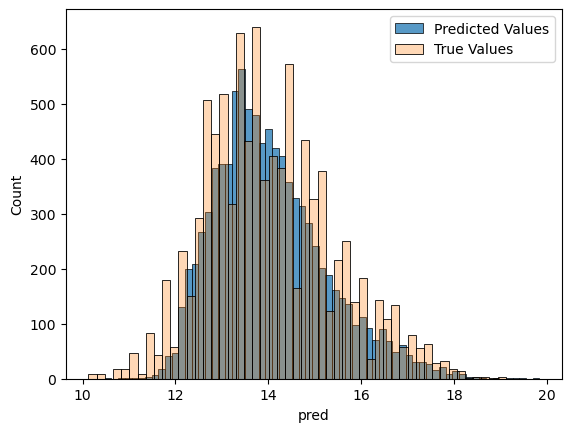

In [117]:
# Histogram for our model
fig,ax = plt.subplots()
sns.histplot(pos_hp_data,x='pred',ax=ax,label='Predicted Values')
sns.histplot(pos_hp_data,x='adjusted_market_value',ax=ax,alpha=0.3,label='True Values')
plt.legend()
plt.show()

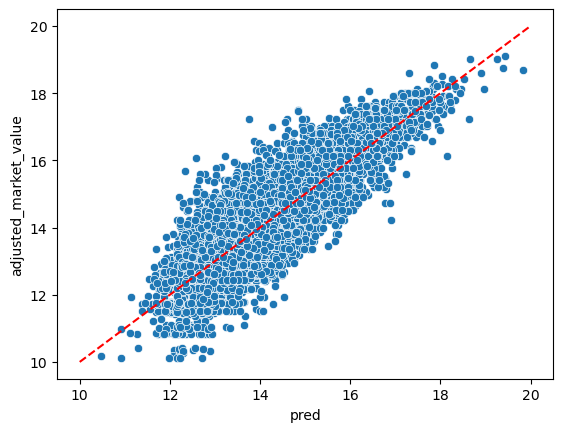

In [118]:
x = np.linspace(10,20)
fig,ax = plt.subplots()
sns.scatterplot(pos_hp_data,x='pred',y='adjusted_market_value')
plt.plot(x,x,color='red',linestyle='--')
plt.show()

## Hyperparameter tuning

This takes in the set of possible parameters defined in the ensamble_model.py and randomly chooses them as it goes through the n_iter=100

In [10]:
# Lets try some hyperparameter tuning:

hp = em.hyperparameter_tuning(train,n_iter=1000,cv=3,scale='log',beta=1)

# After it gets done doing its hyperparameter tuning, it saves the best model, the parameters for that model, and the score 
# (which is just RMSE for now, I can change it later to do what ever score you want to use)

print(hp.best_params)  # Best parameters in a dictionary object
print(hp.best_score)   # the best RMSE
print(hp.best_model)   # the ensamble_model() object that has the best parameters above and score.

# You can now use the hp.best_model to do predictions and we can save it later once we have the one we want.

# you can now do 
best_model_prediction = hp.best_model.predict(train)


{'G': {'model': 'LR', 'param': {}}, 'D': {'model': 'LR', 'param': {}}, 'M': {'model': 'RFR', 'param': {'max_depth': 5, 'n_estimators': 20, 'max_features': 0.75, 'min_samples_split': 5, 'min_samples_leaf': 1, 'bootstrap': True}}, 'F': {'model': 'RIDGE', 'param': {'alpha': np.float64(4.183673469387755)}}}
1.013867233554123


In [11]:
hp.best_model.perform_CV(train)

MSE for train: mean: 0.8410724137239306 std: 0.005425015400903937
MSE for test:  mean: 0.9111503585256846  std: 0.04821973676867641

RMSE for train: mean: 0.9170952176239971 std: 0.002962352970896379
RMSE for test: mean: 0.9542062352765253 std: 0.0253144046954571

R^2 for train: mean: 0.5656580614959832 std: 0.002640790302511171
R^2 for test: mean: 0.5284766099473235 std: 0.026728189756051148

MAE for train: mean: 0.7183515422398641 std: 0.00163673570855802
MAE for test: mean: 0.7468300286997503 std: 0.01799796187270791

MAPE for train: mean: 0.05158278487137735 std: 0.0001331801037556778
MAPE for test: mean: 0.05358336375531612 std: 0.001460397945291499

